In [2]:
import random

def readData(filename):
    dataSet = []
    with open(filename,encoding='utf-8') as f:
        for line in f:
            x1,x2,y=line.strip().split(" ")
            dataSet.append([x1,x2,y])
    f.close()

    return dataSet

# Give the read data
dataSet = readData('data/Dbig.txt')

# shuffle the data
random.shuffle(dataSet)

train = dataSet[0:8192]
test = dataSet[8192:]

# size 32
random.shuffle(train)
train_32 = train[0:32]

# size 128
random.shuffle(train)
train_128 = train[0:128]

# size 512
random.shuffle(train)
train_512 = train[0:512]

# size 2048
random.shuffle(train)
train_2048 = train[0:2048]

# size 8192
train_8192 = train

N:32 Number of node: 9 Error: 0.09900442477876106
N:128 Number of node: 19 Error: 0.07079646017699115
N:512 Number of node: 55 Error: 0.05033185840707965
N:2048 Number of node: 113 Error: 0.03152654867256637
N:8192 Number of node: 235 Error: 0.017699115044247787


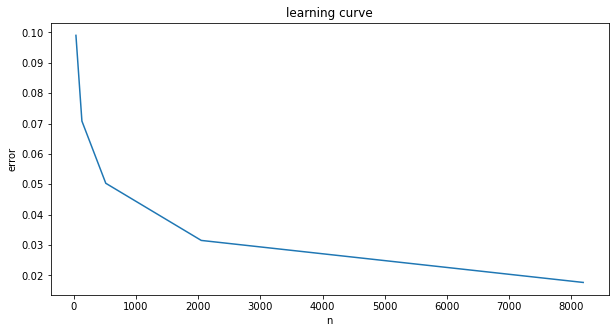

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt

tree = tree.DecisionTreeClassifier()

def evaluate_tree_with_sklearn(tree,trainSet,testSet):
    X = [[data[0], data[1]] for data in trainSet]
    Y = [data[2] for data in trainSet]
    tree = tree.fit(X,Y)
    num = tree.tree_.node_count
    X_ = [[data[0], data[1]] for data in testSet]
    Y_ = [data[2] for data in testSet]
    Y_hat = tree.predict(X_)
    
    count = 0
    for i in range(len(Y_)):
        if(int(Y_[i])!=int(Y_hat[i])):
            count += 1
    error = count/len(Y_)
    
    return num, error

num_32, err_32 = evaluate_tree_with_sklearn(tree,train_32,test)
num_128, err_128 = evaluate_tree_with_sklearn(tree,train_128,test)
num_512, err_512 = evaluate_tree_with_sklearn(tree,train_512,test)
num_2048, err_2048 = evaluate_tree_with_sklearn(tree,train_2048,test)
num_8192, err_8192 = evaluate_tree_with_sklearn(tree,train_8192,test)

print("N:32","Number of node:",num_32,"Error:",err_32)
print("N:128","Number of node:",num_128,"Error:",err_128)
print("N:512","Number of node:",num_512,"Error:",err_512)
print("N:2048","Number of node:",num_2048,"Error:",err_2048)
print("N:8192","Number of node:",num_8192,"Error:",err_8192) 

n = [32,128,512,2048,8192]
err = [err_32,err_128,err_512,err_2048,err_8192]

plt.figure(figsize = (10,5))
plt.title('learning curve')
plt.plot(n,err)
plt.xlabel('n')
plt.ylabel('error')

plt.show()